In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif, chi2, f_classif

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [31]:
data = pd.read_csv('titanic/train.csv', sep = ",")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
data.shape

(891, 12)

<AxesSubplot:xlabel='Survived', ylabel='Count'>

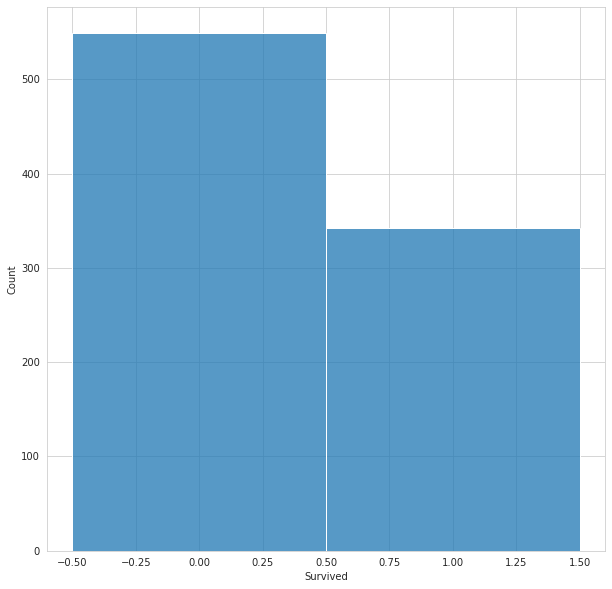

In [33]:
fig, ax = plt.subplots(figsize=(10,10)) 

sns.histplot(data['Survived'], discrete=True)

# Обработка пропущенных значений

In [34]:
print('Процент пустых данных по столбцам:')
data.isnull().sum()/data.shape[0]*100

Процент пустых данных по столбцам:


PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [35]:
data.drop('Cabin', axis=1, inplace=True)

data = data.dropna(subset=['Age'])

data = data.dropna(subset=['Embarked'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [36]:
data.shape

(712, 11)

In [37]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Кодирование категориальных признаков

In [38]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [39]:
def fitTransrotmRepr(df, col):
    encoder = LabelEncoder()
    df[[col]] = encoder.fit_transform(df[[col]])
    encoders = df[col].unique()
    labels = encoder.inverse_transform(encoders)
    labelMap = dict(zip(labels, encoders))
    print(labelMap)

In [40]:
fitTransrotmRepr(data, 'Sex')
fitTransrotmRepr(data, 'Embarked')
data.head()

{'male': 1, 'female': 0}
{'S': 2, 'C': 0, 'Q': 1}


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [41]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object

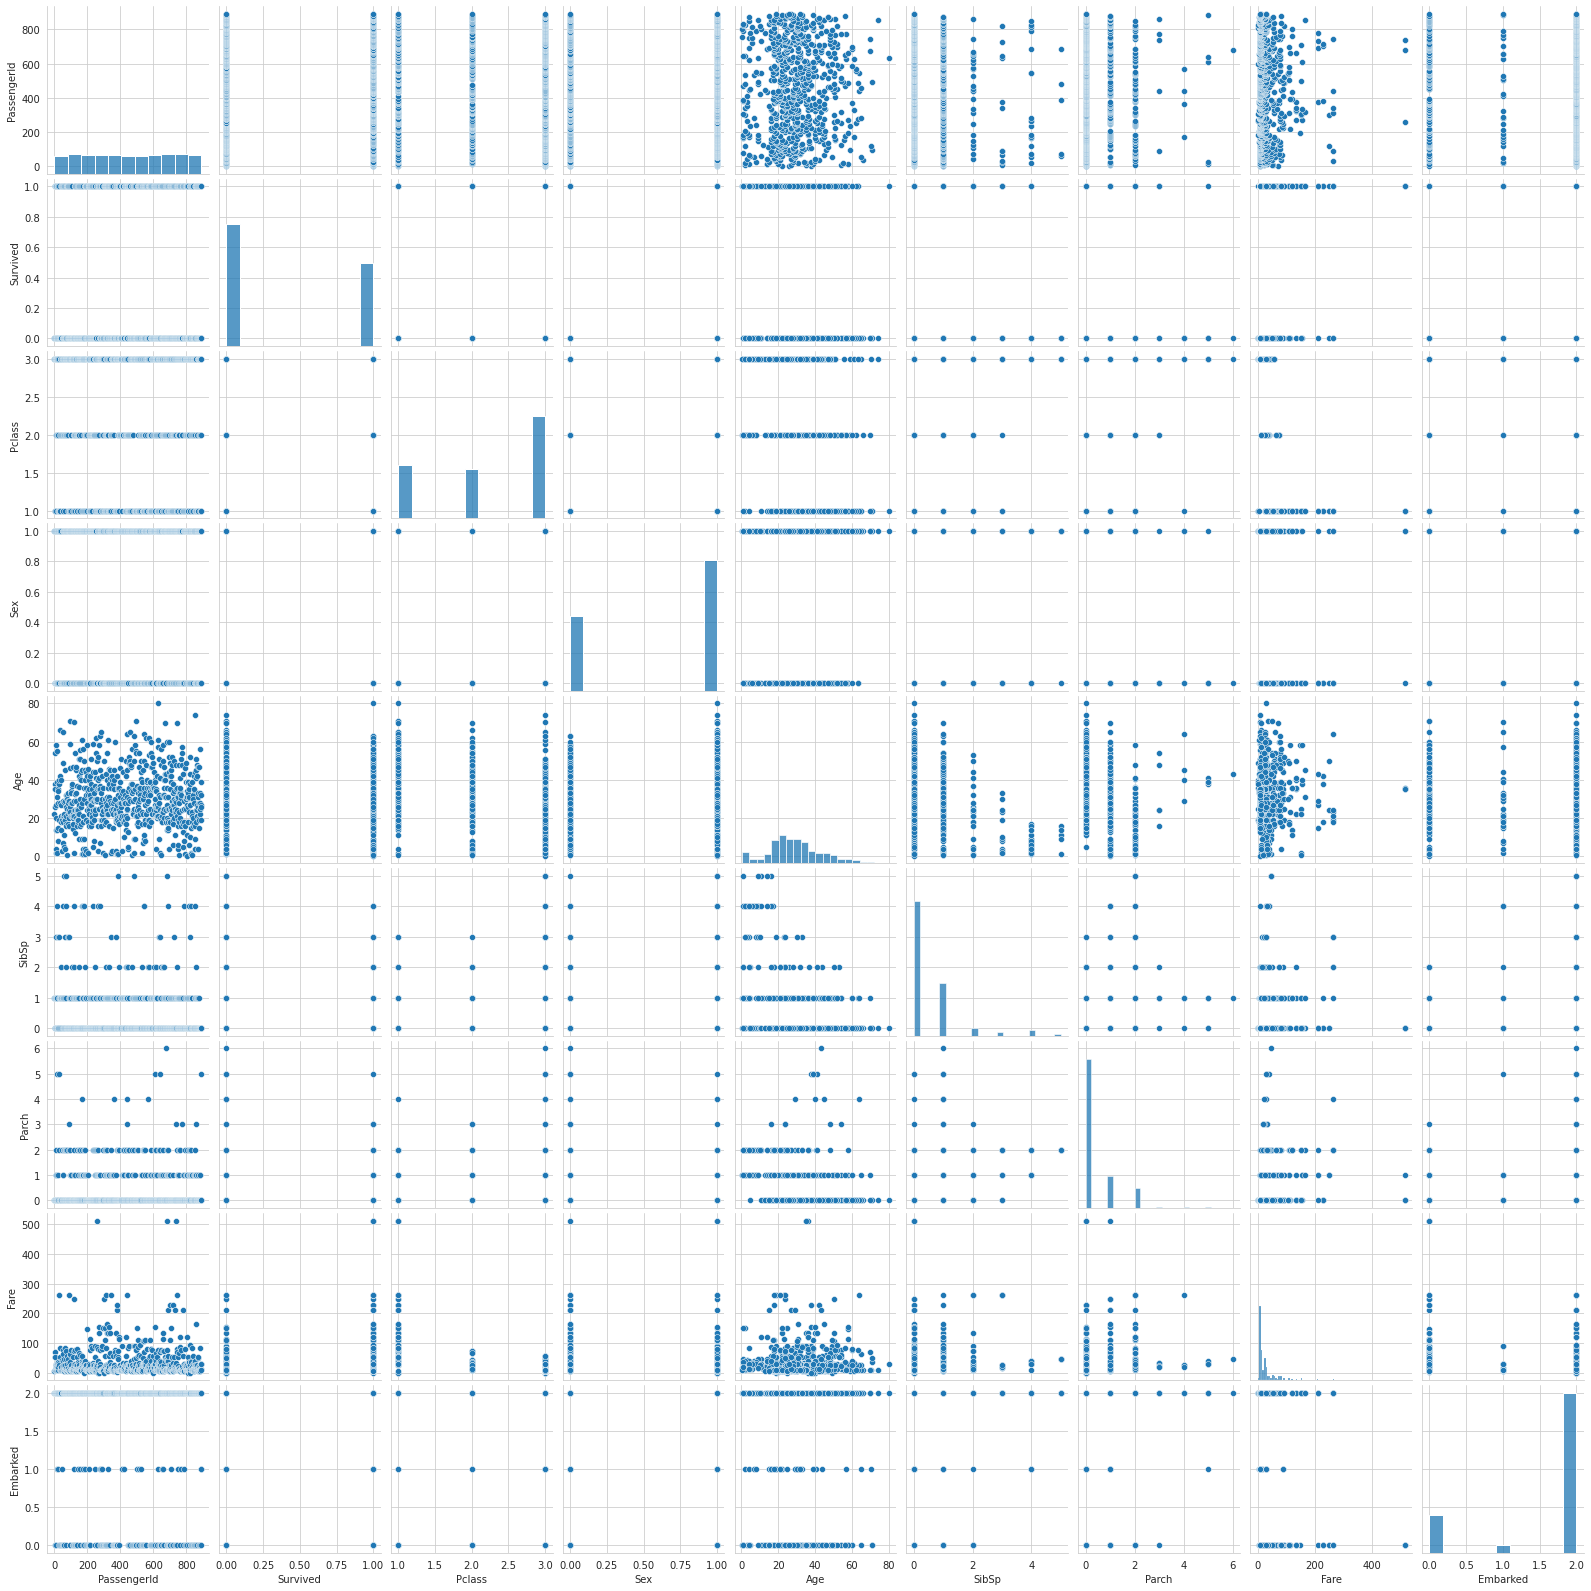

In [42]:
sns.pairplot(data)

# Отбор признаков

## Удаление ненужных признаков

In [43]:
data.drop('Name', axis=1, inplace=True)
data.drop('Ticket', axis=1, inplace=True)
data.drop('PassengerId', axis=1, inplace=True)

## Отбор на основе корреляции

<AxesSubplot:>

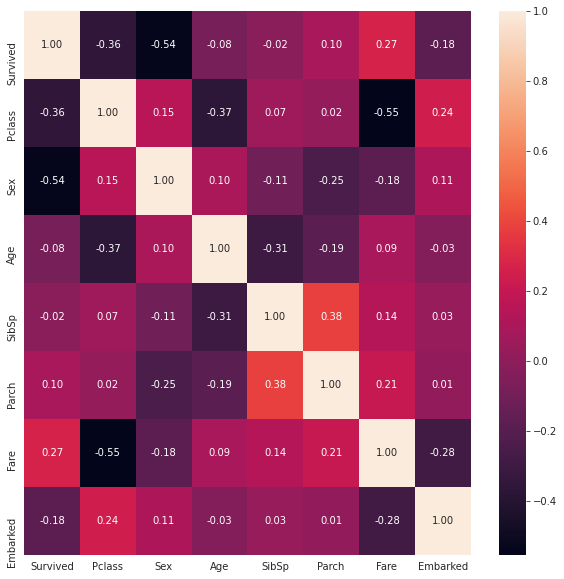

In [44]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f')

## Отбор методом на основе статистических характеристик и методом вложений

In [45]:
class FeatureSelector:
    def __init__(self, df, target, method, index, isModel):
        if isModel:
            model = method()
            model.fit(df.drop(columns=[target]), df[target])
            self.mic = model.feature_importances_
            
        elif index:
            self.mic = method(df.drop(columns=[target]), df[target])[1]
            
        else:
            self.mic = method(df.drop(columns=[target]), df[target])
            
        self.mic = pd.Series(self.mic)
        self.mic.index = df.drop(columns=[target]).columns
        
    def represent(self):    
        self.mic.sort_values(ascending=False).plot.bar()


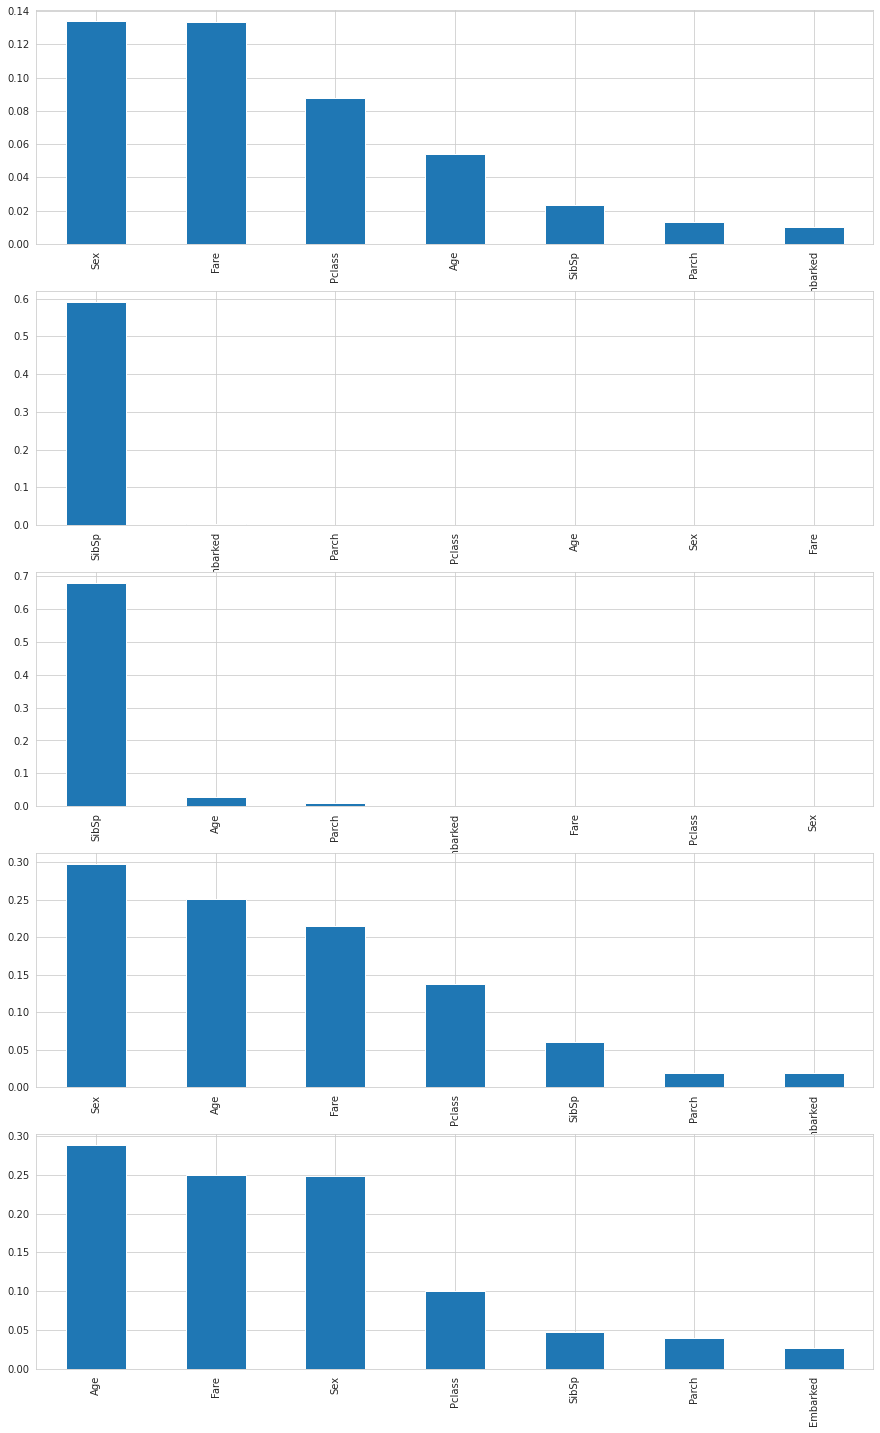

In [46]:
selectors = [
    FeatureSelector(data, 'Survived', mutual_info_classif, False, False),
    FeatureSelector(data, 'Survived', chi2, True, False),
    FeatureSelector(data, 'Survived', f_classif, True, False),
    FeatureSelector(data, 'Survived', DecisionTreeClassifier, False, True),
    FeatureSelector(data, 'Survived', RandomForestClassifier, False, True)
]
plt.subplots(figsize=(15,25))
for i in range(len(selectors)):
    plt.subplot(5, 1, i + 1)
    selectors[i].represent()

In [47]:
def joinhist(df, col, target):
    plt.subplots(figsize=(15,10))
    
    plt.subplot(2, 2, 1)
    sns.histplot(df[col], discrete=True)
    
    plt.subplot(2, 2, 3)
    sns.histplot(df, x=col, y=target, discrete=True)

    plt.subplot(2, 2, 4)
    sns.histplot( y = df[target], discrete=True)

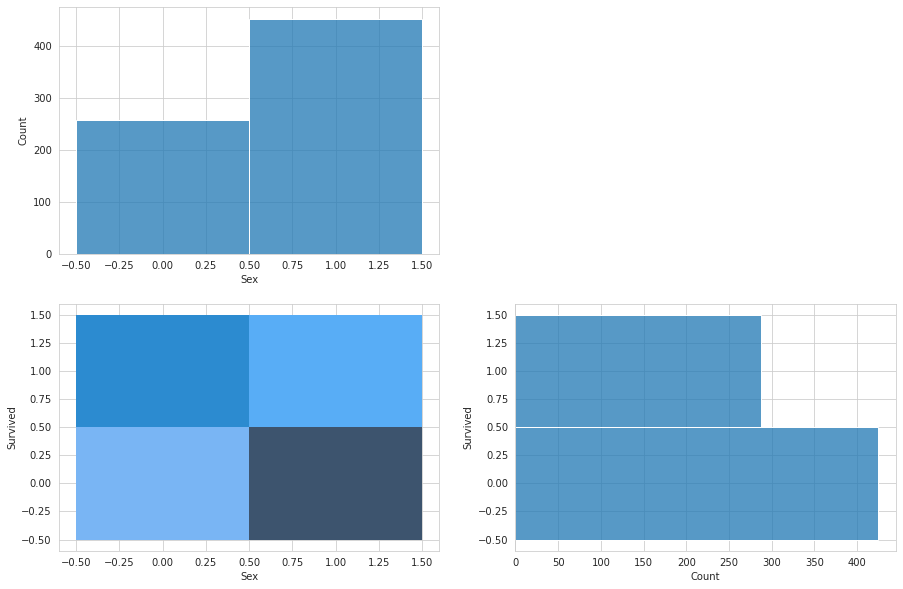

In [48]:
joinhist(data, 'Sex', 'Survived')

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

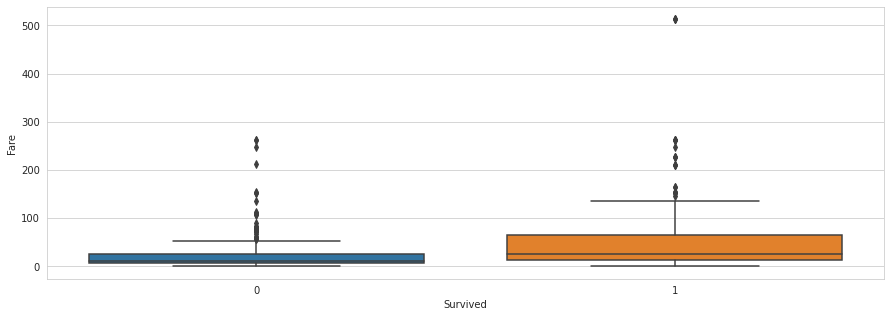

In [49]:
fig, ax = plt.subplots(figsize=(15,5)) 
sns.boxplot(x='Survived', y='Fare', data=data)

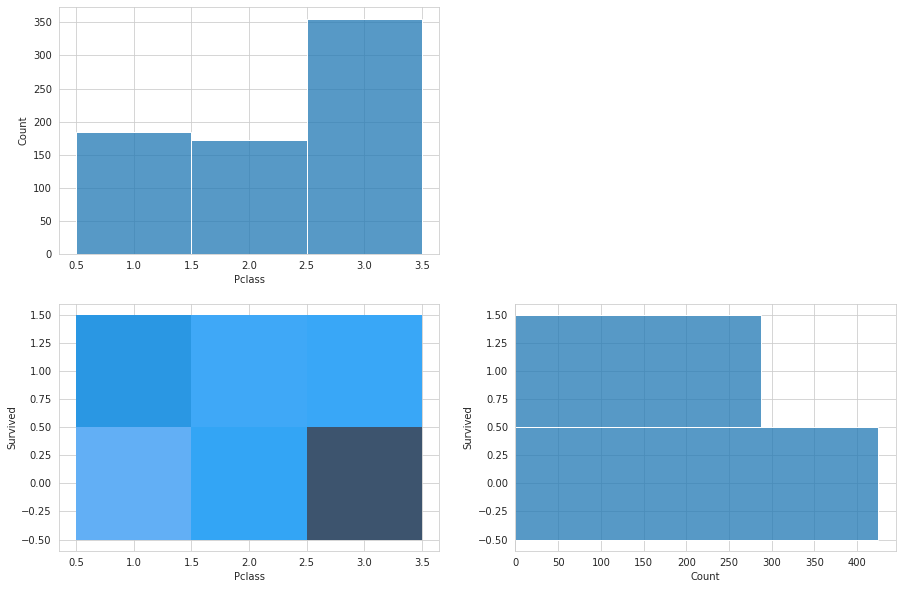

In [51]:
joinhist(data, 'Pclass', 'Survived')

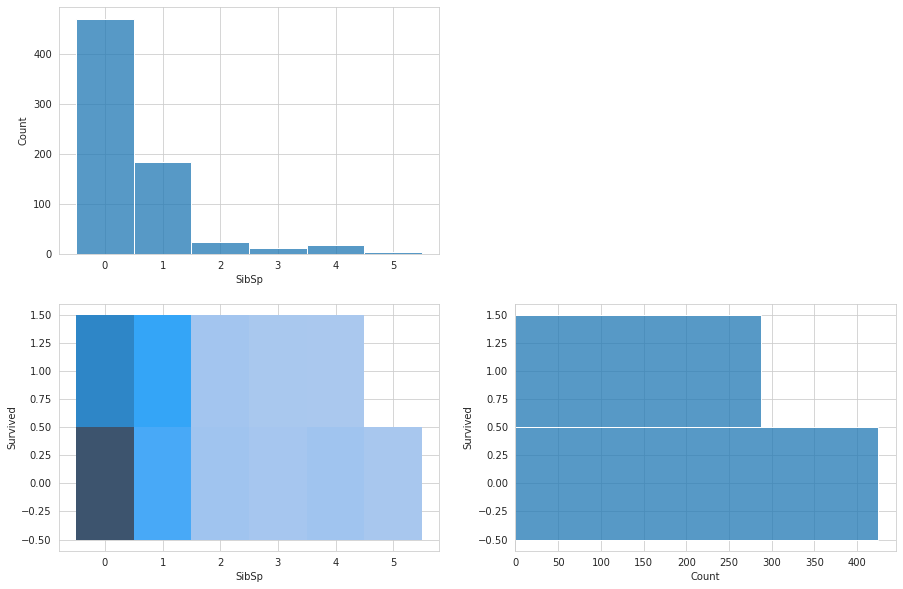

In [53]:
joinhist(data, 'SibSp', 'Survived')

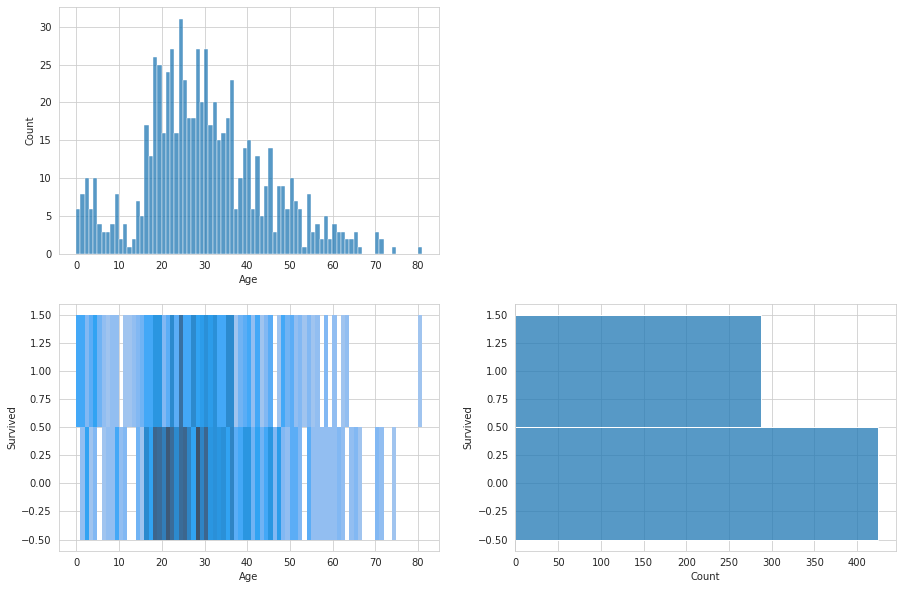

In [54]:
joinhist(data, 'Age', 'Survived')

In [60]:
selectedFeatures = [
    'Sex',
    'Age',
    'Pclass',
    'SibSp'
]

# Обучение моделей

In [61]:
models = {
    'KNN': KNeighborsClassifier,
    'LR': LogisticRegression,
    'DTC': DecisionTreeClassifier,
    'RFC': RandomForestClassifier,
    'GBC': GradientBoostingClassifier
    
}

In [62]:
xTrain, xTest, yTrain, yTest =  train_test_split(
    data.drop(columns=['Survived']),
    data['Survived'], test_size=0.3, 
    random_state = 1)

In [63]:
report = []
for modelName, model in models.items():
    tmp = [modelName + '_all',]
    currModel = model()
    currModel.fit(xTrain, yTrain)
    yPred = currModel.predict(xTest)
    tmp.append(accuracy_score(yTest, yPred))
    tmp.append(precision_score(yTest, yPred))
    tmp.append(recall_score(yTest, yPred))
    report.append(tmp)

In [65]:
xTrain, xTest, yTrain, yTest = train_test_split(
    data[selectedFeatures],
    data['Survived'], 
    test_size=0.3, 
    random_state = 1)

In [66]:
for modelName, model in models.items():
    tmp = [modelName + '_sel',]
    currModel = model()
    currModel.fit(xTrain, yTrain)
    yPred = currModel.predict(xTest)
    tmp.append(accuracy_score(yTest, yPred))
    tmp.append(precision_score(yTest, yPred))
    tmp.append(recall_score(yTest, yPred))
    report.append(tmp)

In [67]:
dfReport = pd.DataFrame(report, columns=['Model','Accuracy','Precision','Recall'])
dfReport = dfReport.sort_values(by=['Model'])
dfReport.head(10)

,Model,Accuracy,Precision,Recall
2,DTC_all,0.742991,0.694118,0.670455
7,DTC_sel,0.761682,0.717647,0.693182
4,GBC_all,0.799065,0.784810,0.704545
9,GBC_sel,0.789720,0.752941,0.727273
0,KNN_all,0.649533,0.591549,0.477273
5,KNN_sel,0.775701,0.770270,0.647727
1,LR_all,0.785047,0.744186,0.727273
6,LR_sel,0.789720,0.741573,0.750000
3,RFC_all,0.761682,0.712644,0.704545
8,RFC_sel,0.766355,0.697917,0.761364


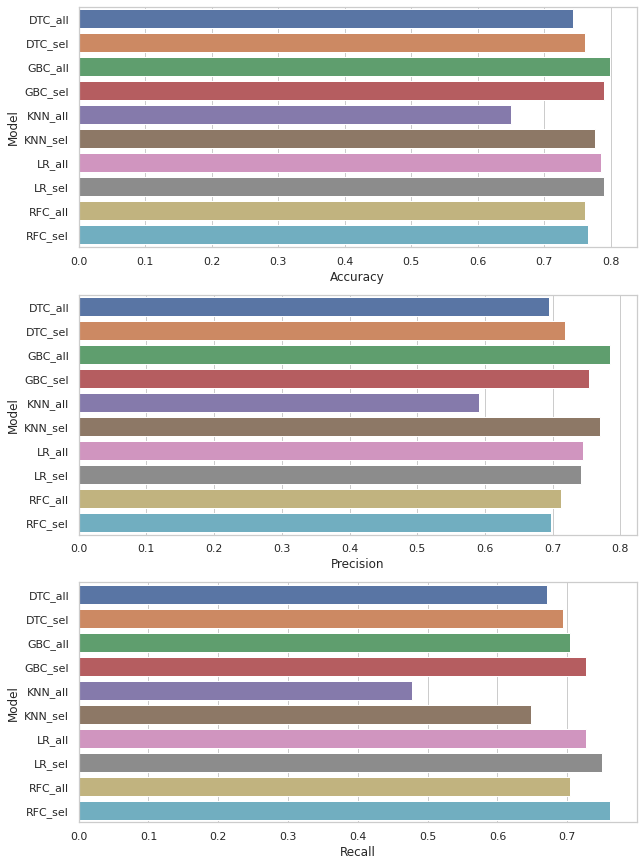

In [68]:
i = 1
for col in dfReport.drop(columns=['Model']):
    sns.set(rc={'figure.figsize':(10,15)})
    sns.set_style("whitegrid")
    plt.subplot(3, 1, i)
    sns.barplot(x=col, y="Model", data=dfReport)
    i += 1